# Chapter_03 (Classification)
## IN Chapter Exercises

### MINST Dataset exploration
Set of 70000 small images of handwritten numbers by high school students and employees of the US Census Bureau.



In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
mnist = fetch_openml('mnist_784', as_frame = False)
print(mnist)

/home/rahulkumar1/.local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


{'data': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object), 'frame': None, 'categories': {}, 'feature_names': ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', '

Seperating the Input data from the target values.

In [2]:
X,y = mnist.data,mnist.target
X[0].shape

(784,)

Defining a function which takes input as greay scale map of a image and plots that image.

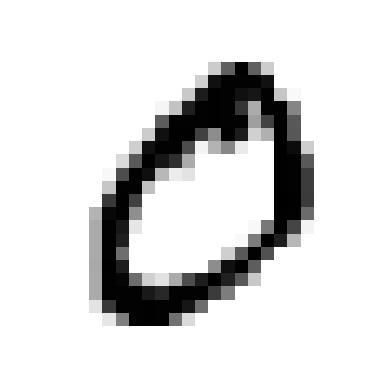

In [3]:
 
def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap = "binary")
    plt.axis("off")
    plt.show()

plot_digit(X[1])

In [4]:
X_train, y_train, y_test, X_test = X[0:60000],y[0:60000],y[60000:],X[60000:] 

### Binary Classifier (5-detector)

In [5]:
#Creating training and  dataset 
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')
print(y_train_5)

[ True False False ...  True False False]



### SGDClassifier
Let's create a SGDclassifier (Stochastic Gradient Descent) as SGD is capable of handling a large amount of data efficiently.
We, will be using the SGDClassifier class from scikit-Learn.

In [6]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(random_state=42)

In [7]:
sgd_clf.predict(X_test)

array([False, False, False, ..., False,  True, False])

#### Measuring accuracy using k-fold crossvalidation

In [8]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train,y_train_5, cv = 2, scoring = "accuracy")

array([0.95506667, 0.9524    ])

wow, 95% accuracy, on all cross-validation sets, But this could be just a bias, let's crerate a dummy classifier which always gives 0(not 5) as an output no matter what the input is. 

In [9]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train,y_train_5)
y = dummy_clf.predict(X_train)
print(any(dummy_clf.predict(X_train)))
cross_val_score(dummy_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

False


array([0.90965, 0.90965, 0.90965])

So, you can have a Idea that the dummy classifier is also giving a accuracy of above 90%, that's because there are only 10perc positive cases in the whole dataset and by labelling all cases False, the dummy classifier is still giving 90% correct classifications. That's why accuracy is generally not a good performance metric for classification tasks.

A better way of looking at the performance metric for a classification task is to look at the confusion matrix (CM) of the classifer.

### Confusion Matrix


The general idea of a confuaion matrix is to calculate the number of times the classifier classified A as B in all A/B pairs.

In [15]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv = 3)


In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

Each row in the confusion matrix represents the atual classes and each column represents predicted class, and a perfect classifier would have values only on main diagonal with all other entries = 0 

Confusion matrix gives lots of infomation, sometimes other metrics derived from confusion matrix are also used, for eg. 

# Precision
                       
Precision = $ TP/(TP+FP) $ where, TP = Number of True Positives and FP = Number of False Positives

# Recall

Recall = $ TP/(TP+FN) $ where, TP = Number of True Positives and FN = Number of False negatives


In [18]:
from sklearn.metrics import precision_score , recall_score
ps = precision_score(y_train_5,y_train_pred)
re = recall_score(y_train_5,y_train_pred)
print(ps,re)

0.8370879772350012 0.6511713705958311


## F1 Score

It is sometimes conviunient to combine recall and precision to get a single metric for the performance of the classifier for e.g. F1 score

$F1 = 1/(1/precision + 1/recall)  =  (precision*recall)/(presision + recall)$

In [21]:
from sklearn.metrics import f1_score
f1 = f1_score(y_train_5, y_train_pred)
print(f1)

0.7325171197343846


Unfortunately you can't have both high precision and high recall, increasing one will supress other and this is called the precision/recall trade-off

##### If someone says, “Let’s reach 99% precision”, you should ask, “At what recall?”

### The ROC(Reciever operating characteristic) Curve.